# Exploratory Data Analysis - House Prices

## Importing libraries

In [200]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Defining functions

In [201]:
def create_null_table(df):
    null_count = df.isnull().sum()
    null_count = null_count[null_count > 0]
    null_percentage = 100 * null_count / len(df)
    null_table = pd.concat([null_count, null_percentage], axis=1)
    null_table.columns = ['count', 'percentage']
    null_table.sort_values(by=['count'], ascending=False, inplace=True)
    return null_table

In [202]:
def compare_countplot_train_and_test(data_train, data_test, x):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), layout='constrained')
    sns.countplot(data=data_train, x=x, ax=axs[0])
    sns.countplot(data=data_test, x=x, ax=axs[1])
    axs[0].set_title('Train Data')
    axs[1].set_title('Test Data')

## Loading data

In [203]:
if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    # Kaggle-specific configuration
    TEST_PATH = Path('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
    TRAIN_PATH = Path('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
else:
    # Local configuration
    TEST_PATH = Path('data/test.csv')
    TRAIN_PATH = Path('data/train.csv')

houses_test = pd.read_csv(TEST_PATH)
houses_train = pd.read_csv(TRAIN_PATH)

In [204]:
print('Full train dataset shape is {} rows and {} columns.'.format(houses_train.shape[0], houses_train.shape[1]))
print('Full test dataset shape is {} rows and {} columns.'.format(houses_test.shape[0], houses_test.shape[1]))

Full train dataset shape is 1460 rows and 81 columns.
Full test dataset shape is 1459 rows and 80 columns.


In [205]:
houses_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [206]:
houses_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [207]:
houses_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

`Id` columns is not important for the analysis neither for the model, so it will be dropped from both datasets.

In [209]:
houses_train = houses_train.drop(columns=['Id'])
test_id = houses_test['Id']
houses_test = houses_test.drop(columns=['Id'])

## Target: Sales Price

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64



<Figure size 1000x700 with 0 Axes>

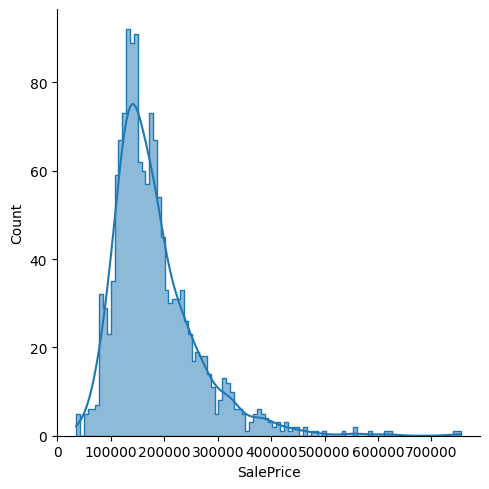

In [210]:
print(houses_train['SalePrice'].describe(), end='\n\n')
plt.figure(figsize=(10,7));
sns.displot(houses_train['SalePrice'], bins=100, kde=True, element='step');

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64



<Figure size 1000x700 with 0 Axes>

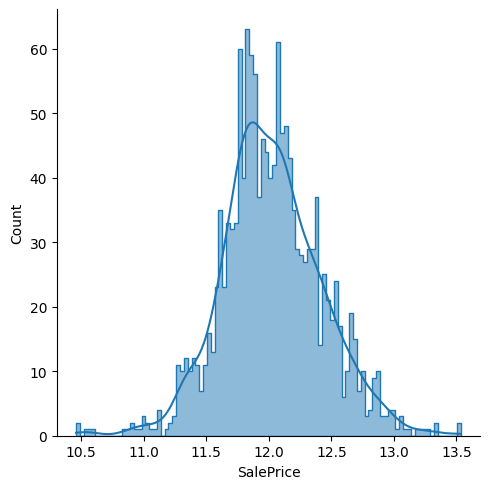

In [211]:
print(np.log(houses_train['SalePrice']).describe(), end='\n\n')
plt.figure(figsize=(10,7));
sns.displot(np.log(houses_train['SalePrice']), bins=100, kde=True, element='step');

## Predictors: comparing distributions from train and test dataframes

### Numerical features

In [212]:
numerical_features = houses_test.select_dtypes(exclude=['object'])
numerical_features_cols = numerical_features.columns

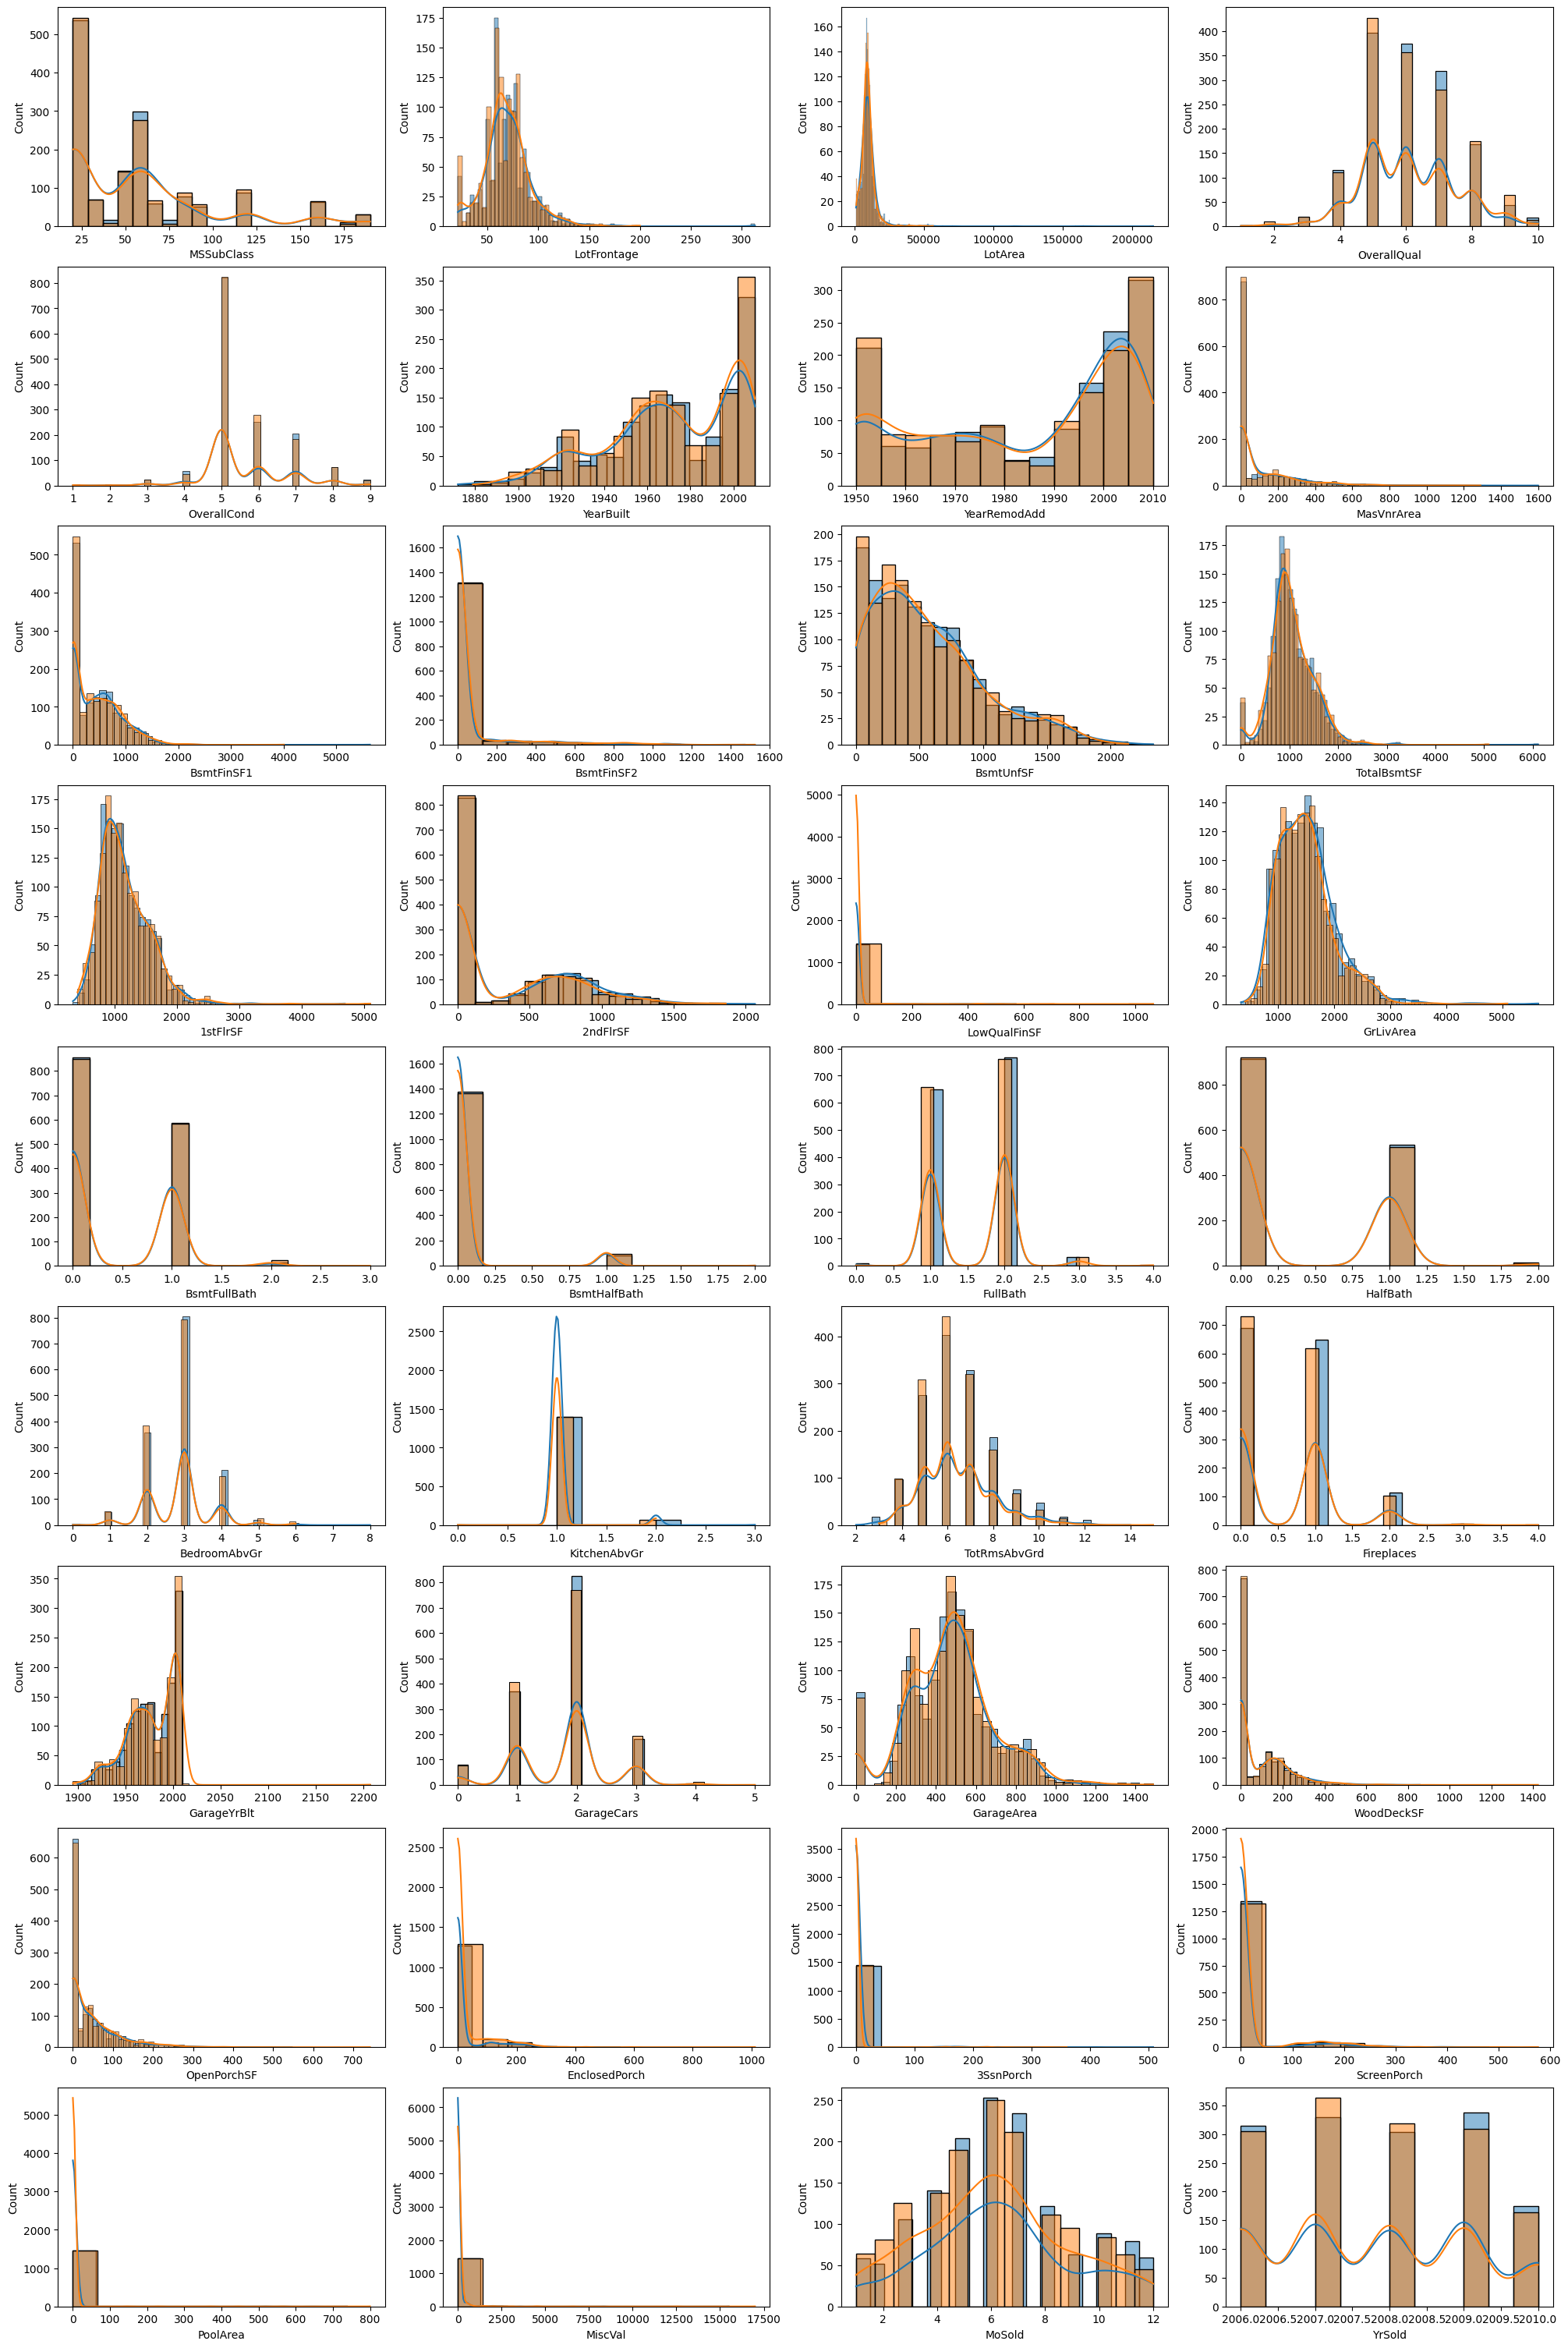

In [213]:
ncols = 4
nrows = int(len(numerical_features_cols) / ncols) if len(numerical_features_cols) % ncols == 0 else int(len(numerical_features_cols) / ncols) + 1

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,30), layout='constrained')
i=0
for row in range(nrows):
    for col in range(ncols):
        if i < len(numerical_features_cols):
            sns.histplot(data=houses_train, x=numerical_features_cols[i],
                         ax=axs[row, col], kde=True)
            sns.histplot(data=houses_test, x=numerical_features_cols[i],
                         ax=axs[row, col], kde=True)
        else:
            axs[row, col].set_axis_off()
        i = i +1

The predictors distribution from test and train dataset are very similar.

## Model Experiment 00 - Using only Numerical Features and Removing Columns with Null Values

That's the simplest approach possible to a machine learning problem.

In [214]:
null_numerical_features_train = create_null_table(houses_train[numerical_features_cols])
print(null_numerical_features_train)

             count  percentage
LotFrontage    259   17.739726
GarageYrBlt     81    5.547945
MasVnrArea       8    0.547945


In [215]:
null_numerical_features_test = create_null_table(houses_test[numerical_features_cols])
print(null_numerical_features_test)

              count  percentage
LotFrontage     227   15.558602
GarageYrBlt      78    5.346127
MasVnrArea       15    1.028101
BsmtFullBath      2    0.137080
BsmtHalfBath      2    0.137080
BsmtFinSF1        1    0.068540
BsmtFinSF2        1    0.068540
BsmtUnfSF         1    0.068540
TotalBsmtSF       1    0.068540
GarageCars        1    0.068540
GarageArea        1    0.068540


In [216]:
df_train_exp00 = houses_train.copy()
y_exp00 = df_train_exp00['SalePrice']
y_log_exp00 = np.log(y_exp00)
X_train_exp00 = df_train_exp00[numerical_features_cols].drop(null_numerical_features_test.index, axis=1)

df_test_exp00 = houses_test.copy()
X_test_exp00 = df_test_exp00[numerical_features_cols].drop(null_numerical_features_test.index, axis=1)

In [217]:
X_train, X_test, y_train_log, y_test_log = train_test_split(X_train_exp00, y_log_exp00, test_size=0.2)

In [218]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)

In [219]:
rf.fit(X_train, y_train_log)
log_oob_r2 = rf.oob_score_
print(f'OOB R^2 Score for log(SalePrice is {log_oob_r2:.4f}')

OOB R^2 Score for log(SalePrice is 0.8619


In [220]:
y_predicted_log = rf.predict(X_test)

In [221]:
mse = mean_squared_error(y_test_log, y_predicted_log)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.03


In [226]:
y_predicted_exp00 = np.exp(rf.predict(X_test_exp00))
y_predicted_exp00

array([124396.39310575, 157482.01346878, 185354.11850492, ...,
       155473.71244095, 134257.26967739, 220756.57902428])

In [229]:
submission_exp00 = pd.DataFrame({'Id': test_id, 'SalePrice': y_predicted_exp00})
submission_exp00.to_csv('submission_exp_00.csv', index=False)

## Missing Variables

### Train DataFrame Overview

In [230]:
null_values_train = create_null_table(houses_train)
print(null_values_train)

              count  percentage
PoolQC         1453   99.520548
MiscFeature    1406   96.301370
Alley          1369   93.767123
Fence          1179   80.753425
MasVnrType      872   59.726027
FireplaceQu     690   47.260274
LotFrontage     259   17.739726
GarageType       81    5.547945
GarageYrBlt      81    5.547945
GarageFinish     81    5.547945
GarageQual       81    5.547945
GarageCond       81    5.547945
BsmtFinType2     38    2.602740
BsmtExposure     38    2.602740
BsmtFinType1     37    2.534247
BsmtCond         37    2.534247
BsmtQual         37    2.534247
MasVnrArea        8    0.547945
Electrical        1    0.068493


In [231]:
null_values_test = create_null_table(houses_test)
print(null_values_test)

              count  percentage
PoolQC         1456   99.794380
MiscFeature    1408   96.504455
Alley          1352   92.666210
Fence          1169   80.123372
MasVnrType      894   61.274846
FireplaceQu     730   50.034270
LotFrontage     227   15.558602
GarageCond       78    5.346127
GarageYrBlt      78    5.346127
GarageQual       78    5.346127
GarageFinish     78    5.346127
GarageType       76    5.209047
BsmtCond         45    3.084304
BsmtExposure     44    3.015764
BsmtQual         44    3.015764
BsmtFinType1     42    2.878684
BsmtFinType2     42    2.878684
MasVnrArea       15    1.028101
MSZoning          4    0.274160
BsmtFullBath      2    0.137080
BsmtHalfBath      2    0.137080
Functional        2    0.137080
Utilities         2    0.137080
GarageCars        1    0.068540
GarageArea        1    0.068540
TotalBsmtSF       1    0.068540
KitchenQual       1    0.068540
BsmtUnfSF         1    0.068540
BsmtFinSF2        1    0.068540
BsmtFinSF1        1    0.068540
Exterior

The test dataframe has more columns, with null values than the train dataframe, but the number of missing values is too small.

First, let's investigate the feature `PoolQC`.

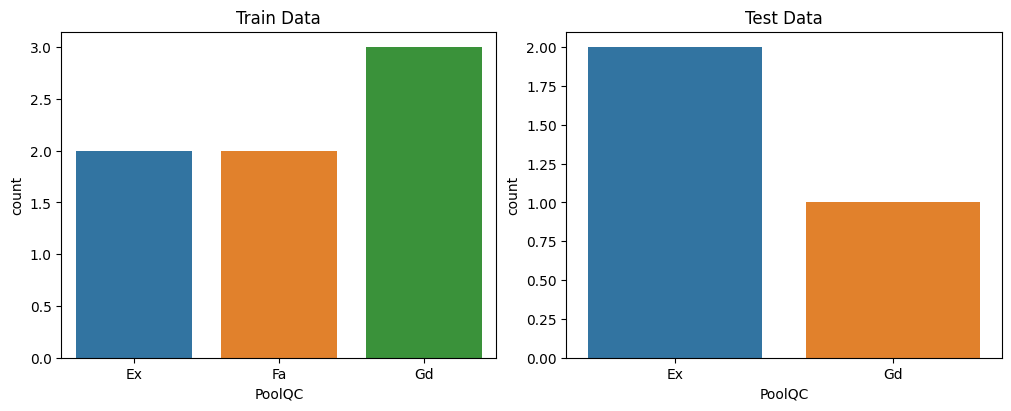

In [232]:
compare_countplot_train_and_test(data_train=houses_train, data_test=houses_test, x='PoolQC')

Most of part this feature, is of null values. We also have another feature related to pool called `PoolArea`. Does all the rows samples with `PoolArea` also have `PoolQC` filled?

In [233]:
houses_train['HasPoolQC'] = ~houses_train['PoolQC'].isnull()
houses_train['HasPool'] = houses_train['PoolArea'] > 0
houses_test['HasPoolQC'] = ~houses_test['PoolQC'].isnull()
houses_test['HasPool'] = houses_test['PoolArea'] > 0

In [234]:
houses_train.groupby(['HasPoolQC', 'HasPool']).size()

HasPoolQC  HasPool
False      False      1453
True       True          7
dtype: int64

In [235]:
houses_test.groupby(['HasPoolQC', 'HasPool']).size()

HasPoolQC  HasPool
False      False      1453
           True          3
True       True          3
dtype: int64

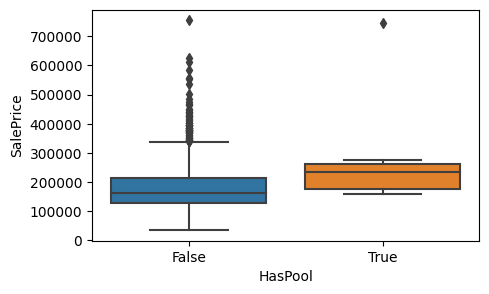

In [236]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=houses_train, x='HasPool', y='SalePrice');

Although the fact of a house with pool have higher prices, the number of sample with pool is too small for both datasets: train and test.

Also, in the Test dataset, the lack of `PoolQC` does not indicate the lack of Pool.

Because of these insights, the features `PoolQC` and `PoolArea` will be removed from the dataset.

In [237]:
houses_train.drop(columns=['PoolArea', 'PoolQC', 'HasPoolQC', 'HasPool'], inplace=True)

In [238]:
houses_test.drop(columns=['PoolArea', 'PoolQC', 'HasPoolQC', 'HasPool'], inplace=True)

## Preprocessing data

In [240]:
# one_hot_train = pd.get_dummies(houses_train.select_dtypes(include=["object"]), drop_first=True)
# preprocessed_train = pd.concat([one_hot_train, houses_train[numerical_features_cols]], axis=1)
# preprocessed_train.head(2)

## Creating a tree based model

In [241]:
# predictors = preprocessed_train
# target = houses_train['SalePrice']
# X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=0)
# clf = DecisionTreeRegressor()
# model = clf.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse:.2f}')